In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import os
import math
from statistics import mean
import statsmodels.api as sm

In [240]:
'''loading in data,cleaning it up,making it monthly instead of daily for computational efficiency'''

BrentOilPrices = pd.read_csv('BrentOilPrices.csv')
#plt.plot(BrentOilPrices['Price'])
BrentOilPrices.std()
BrentOilPrices[["day", "month", "year"]] = BrentOilPrices["Date"].str.split("-", expand = True)
BrentOilPricesMonthly = BrentOilPrices[BrentOilPrices['day']== '1']
BrentOilPricesMonthly.head()
BrentOilPricesMonthlyPrice = BrentOilPricesMonthly['Price']

'''Euler-Maruyama method; Ornstein–Uhlenbeck process'''

def difference(df): #Courtesy of one of my group members
    diff = list()
    for i in range(1,len(df)):
        value2 = df[i] - df[i -1]
        value = value2/df[i]
        diff.append(value)
    return np.array(diff)

def average(x=[]):
    average = mean(x)
    return average
    

def Euler_M(sims):
    '''empty list to be used later to store r_squared'''
    fair_price_total = [[] for z in range(0,sims)]
    lis = []
    
    '''running sims number of simulation'''
    for j in range(0,sims):
        
        BOPstd = BrentOilPricesMonthlyPrice.std()
        BOPmn = BrentOilPricesMonthlyPrice.mean()
        time_constant = 0.05
        #print(BrentOilPricesMonthlyPrice)
        dt = 1/len(BrentOilPricesMonthlyPrice)
        T = 1
        n=ceil(T/dt)
        time = np.linspace(0,T,n)

        '''renormalizing std and dt'''

        std_renorm = BOPstd*np.sqrt(2/time_constant)
        sqrtdt = np.sqrt(dt)

        '''intializing array for simulated data'''

        fair_price = np.zeros(n)

        '''intial conditions based on data'''

        fair_price[0] = 18.65
        #print(fair_price.size)

        '''integration through each time step/discrete integration aka Euler-Maruyama method'''

        for i in range(n - 1):
            '''this is the SDE called Ornstein–Uhlenbeck process'''

            fair_price[i + 1] = fair_price[i] + dt * (-(fair_price[i] - std_renorm) / tau) + \
            std_renorm * sqrtdt * np.random.randn()

            '''the information that follows \ is white noise, used to simulate uncertainity in the measurements
            aka data. this is what makes it a SDE vs ODE'''

        fair_price_total[j].append(fair_price)
        
        #average_index = np.mean(fair_price_total,axis=0)
        
        
        
                

        '''finding r squared to measure model performance'''
        

        

        BOP = BrentOilPricesMonthlyPrice
        fair_price2 = sm.add_constant(fair_price)
        model = sm.OLS(BOP,fair_price2)  # make the model
        results = model.fit()         # run the OLS fit
        #print(results.params)   
        #print(results.predict())
        #print(results.summary())
        x = results.rsquared
        lis.append(x)
        
    '''graph of model vs actual'''  
    for i in range(0,sims):
        fair_price = np.mean(fair_price_total[i],axis=0)
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(results,1,fig=fig)
        

    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(time, fair_price, lw=2)
    ax.set_title('Simulated Brent Oil Prices Monthly vs time')
    ax.set_xlabel('time')
    ax.set_ylabel('Simulated Brent Oil Prices Monthly')

    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(time,BrentOilPricesMonthlyPrice , lw=2)
    ax.set_xlabel('time')
    ax.set_ylabel('Brent Oil Prices Monthly')
    ax.set_title('Brent Oil Prices Monthly vs time')

    diff = np.abs(fair_price - BrentOilPricesMonthlyPrice)
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(time, diff, lw=2)
    ax.set_title('Difference in Simulated vs Actual Brent Oil Prices Monthly vs time')
    ax.set_xlabel('time')
    ax.set_ylabel('Difference in Simulated vs Actual Brent Oil Prices Monthly')

    plt.show()

    plt.scatter(time,fair_price,lw=0.1,label='Simulated Prices')
    plt.scatter(time,diff,lw=0.1,color='red',label='Difference in prices')
    plt.scatter(time,BrentOilPricesMonthlyPrice,lw=0.1,color='orange',label='Actual Prices')
    plt.legend()
    plt.show()
    
    '''Percent Difference between instances rather than raw to normalize the data'''

    fair_price_percent = difference(fair_price) 
    BOPMP_percent = difference(list(BrentOilPricesMonthly['Price']))
    new_time = np.delete(time,0)
    '''Plotting Percent Differences; want them to be almost identical as indicator of good fit'''

    plt.plot(new_time, fair_price_percent, lw=2,label='Percent Difference in Simulated Prices')
    plt.plot(new_time, BOPMP_percent, lw=2,label='Percent Difference in Actual Prices')
    plt.legend()
    plt.show()
    
    '''Plotting Differences between the two percent differences; want this to be close to 0 for indicator of good fit'''

    plt.plot(new_time, np.abs(fair_price_percent- BOPMP_percent))
    plt.show()

    
    avg_list = average(lis)
    return avg_list, fair_price_total

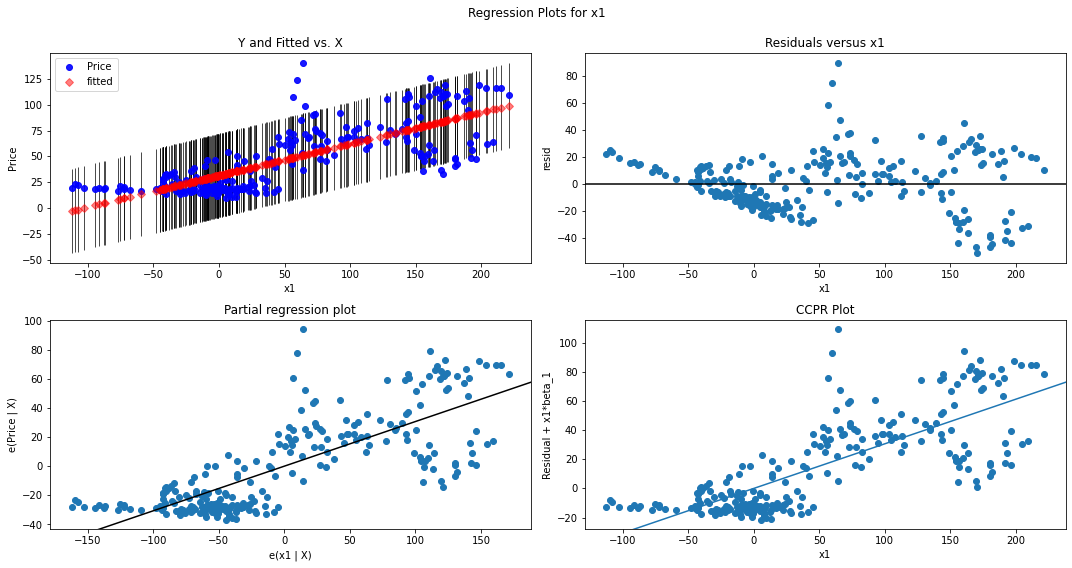

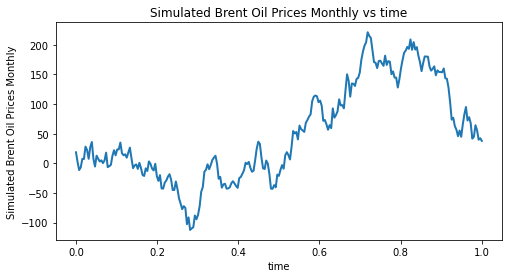

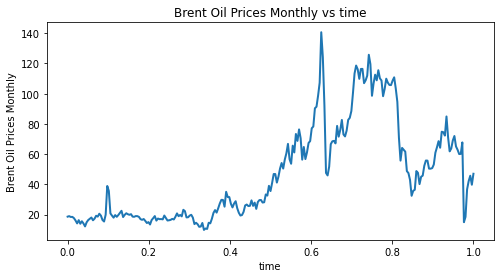

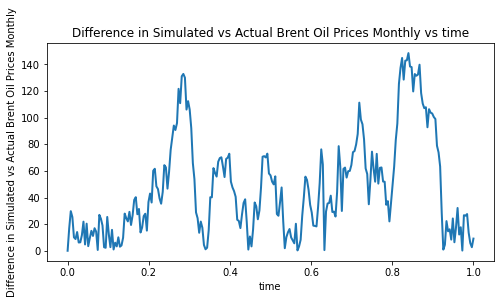

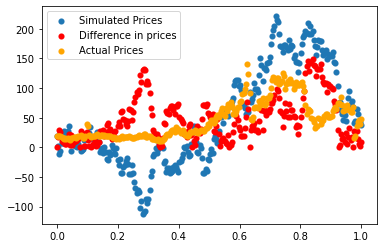

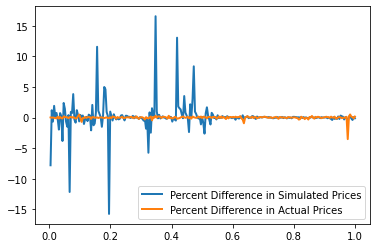

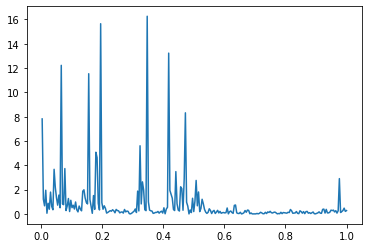

In [241]:
ok, lok= Euler_M(1000)

In [242]:
ok

0.2710719215004144